* Jeremy Beard
* Due 20220424
* Week 7
* MSDS650
* Genie Hays

# Week 7 Lab: Text Analytics

<img align="right" style="padding-right:10px;" src="figures_wk7/topic_modeling.png" width=400><br>

This week's assignment will focus on text analysis of BBC News articles.

## Our Dataset: 
**Dataset:** bbc.csv(Provided in folder assign_wk7)<br>
Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005. <br>
Class Labels: 5 (business, entertainment, politics, sport, tech)

## Text Analytics Lab

**Objective:** 
To demostrate all of the text analysis techniques covered int his week's lecture material. Your submission needs to include the following:
   - Preparation of the text data for analysis
       * Elimination of stopwords, punctuation, digits, lowercase
   - Identify the 10 most frequently used words in the text
       * How about the ten least frequently used words? 
       * How does lemmatization change the most/least frequent words?
           - Explain and demonstrate this topic
   - Generate a world cloud for the text
   - Demonstrate the generation of n-grams and part of speech tagging
   - Create a Topic model of the text
       * Find the optimal number of topics
       * test the accuracy of your model
       * Display your results 2 different ways.
           1) Print the topics and explain any insights at this point.
           2) Graph the topics and explain any insights at this point.


### Deliverables:

Upload your notebook's .ipynb file and your topic_model_viz.html page this week.
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

Reference:
> Graphic comes from https://medium.com/nanonets/topic-modeling-with-lsa-psla-lda-and-lda2vec-555ff65b0b05

# I. Introduction

In this assignment we will begin to explore the world of text analysis and text analytics. We will take some data from BBC News, clean it, and perform some analytics on the data such as identifying frequently used words, generate word clouds, exploring n-grams and part-of-speech tagging, and finding an optimal topic number for use in a Latent Dirichlet Allocation (LDA) model. Let's begin!

# II. Methods, III. Code, and IV. Analysis of Results

In [1]:
# Preparation of the text data for analysis
##  Elimination of stopwords, punctuation, digits, lowercase

# Identify the 10 most frequently used words in the text
##  How about the ten least frequently used words?
##  How does lemmatization change the most/least frequent words?
###   Explain and demonstrate this topic

# Generate a world cloud for the text

# Demonstrate the generation of n-grams and part of speech tagging

# Create a Topic model of the text
##  Find the optimal number of topics
##  test the accuracy of your model
##  Display your results 2 different ways. 
###   1) Print the topics and explain any insights at this point. 
###   2) Graph the topics and explain any insights at this point.

###### Prep of Text Data for Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords, words
import nltk
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud

from nltk.tag import pos_tag
from collections import Counter

import gensim
import gensim.corpora as corpora

from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set()

C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [3]:
df = pd.read_csv("assign_wk7/bbc.csv")
df.columns = ['id', 'news_raw', 'news_type']

In [4]:
df.head()

,id,news_raw,news_type
0,0,UK economy facing 'major risks'\n \n The UK ma...,business
1,1,Aids and climate top Davos agenda\n \n Climate...,business
2,2,Asian quake hits European shares\n \n Shares i...,business
3,3,India power shares jump on debut\n \n Shares i...,business
4,4,Lacroix label bought by US firm\n \n Luxury go...,business


In [5]:
# first, I will perform some word count and character counts
df['word_count'] = df.news_raw.apply(lambda x: len(str(x).split(" ")))
df.head()

,id,news_raw,news_type,word_count
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,329
1,1,Aids and climate top Davos agenda\n \n Climate...,business,454
2,2,Asian quake hits European shares\n \n Shares i...,business,553
3,3,India power shares jump on debut\n \n Shares i...,business,175
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,152


In [6]:
df['char_count'] = df.news_raw.str.len()
df.head()

,id,news_raw,news_type,word_count,char_count
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,329,1996
1,1,Aids and climate top Davos agenda\n \n Climate...,business,454,2727
2,2,Asian quake hits European shares\n \n Shares i...,business,553,3444
3,3,India power shares jump on debut\n \n Shares i...,business,175,1038
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,152,894


In [7]:
# Now for the next step
##  Elimination of stopwords, punctuation, digits, lowercase
stop = stopwords.words('english')

# first let's count the stopwords
df['stopwords'] = df.news_raw.apply(lambda x: len([x for x in x.split() if x in stop]))
df.head()

,id,news_raw,news_type,word_count,char_count,stopwords
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,329,1996,112
1,1,Aids and climate top Davos agenda\n \n Climate...,business,454,2727,161
2,2,Asian quake hits European shares\n \n Shares i...,business,553,3444,171
3,3,India power shares jump on debut\n \n Shares i...,business,175,1038,55
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,152,894,47


In [8]:
# then let's make everything lowercase
df['news_clean'] = df.news_raw.apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()

,id,news_raw,news_type,word_count,char_count,stopwords,news_clean
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,329,1996,112,uk economy facing 'major risks' the uk manufac...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,454,2727,161,aids and climate top davos agenda climate chan...
2,2,Asian quake hits European shares\n \n Shares i...,business,553,3444,171,asian quake hits european shares shares in eur...
3,3,India power shares jump on debut\n \n Shares i...,business,175,1038,55,india power shares jump on debut shares in ind...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,152,894,47,lacroix label bought by us firm luxury goods g...


In [9]:
# now let's remove all punctuation
df['news_clean'] = df.news_clean.str.replace('[^\w\s]','')
df.head()

,id,news_raw,news_type,word_count,char_count,stopwords,news_clean
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,329,1996,112,uk economy facing major risks the uk manufactu...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,454,2727,161,aids and climate top davos agenda climate chan...
2,2,Asian quake hits European shares\n \n Shares i...,business,553,3444,171,asian quake hits european shares shares in eur...
3,3,India power shares jump on debut\n \n Shares i...,business,175,1038,55,india power shares jump on debut shares in ind...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,152,894,47,lacroix label bought by us firm luxury goods g...


In [10]:
# now let's remove all digits
df['news_clean'] = df.news_clean.str.replace('\d+','')
df.head()

,id,news_raw,news_type,word_count,char_count,stopwords,news_clean
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,329,1996,112,uk economy facing major risks the uk manufactu...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,454,2727,161,aids and climate top davos agenda climate chan...
2,2,Asian quake hits European shares\n \n Shares i...,business,553,3444,171,asian quake hits european shares shares in eur...
3,3,India power shares jump on debut\n \n Shares i...,business,175,1038,55,india power shares jump on debut shares in ind...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,152,894,47,lacroix label bought by us firm luxury goods g...


In [11]:
# now let's remove stopwords
df['news_clean'] = df.news_clean.apply(lambda x: " ".join(w for w in x.split() if w not in stop))
df.head()

,id,news_raw,news_type,word_count,char_count,stopwords,news_clean
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,329,1996,112,uk economy facing major risks uk manufacturing...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,454,2727,161,aids climate top davos agenda climate change f...
2,2,Asian quake hits European shares\n \n Shares i...,business,553,3444,171,asian quake hits european shares shares europe...
3,3,India power shares jump on debut\n \n Shares i...,business,175,1038,55,india power shares jump debut shares indias la...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,152,894,47,lacroix label bought us firm luxury goods grou...


In [12]:
#Now let's remove all single-character words
df['news_clean'] = df.news_clean.apply(lambda x: " ".join(x for x in x.split() if len(x) > 1))
df.head()

,id,news_raw,news_type,word_count,char_count,stopwords,news_clean
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,329,1996,112,uk economy facing major risks uk manufacturing...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,454,2727,161,aids climate top davos agenda climate change f...
2,2,Asian quake hits European shares\n \n Shares i...,business,553,3444,171,asian quake hits european shares shares europe...
3,3,India power shares jump on debut\n \n Shares i...,business,175,1038,55,india power shares jump debut shares indias la...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,152,894,47,lacroix label bought us firm luxury goods grou...


The data looks pretty clean now!

###### Word Frequency and Lemmatization

In [13]:
# Identify the 10 most frequently used words in the text
##  How about the ten least frequently used words?
##  How does lemmatization change the most/least frequent words?
###   Explain and demonstrate this topic

#first, let's find the 10 most frequent words
freq = pd.Series(' '.join(df.news_clean).split()).value_counts(ascending=False).to_dict()
list(freq.items())[:10]

[('said', 7253),
 ('mr', 3004),
 ('would', 2577),
 ('also', 2156),
 ('new', 1970),
 ('people', 1969),
 ('us', 1923),
 ('one', 1739),
 ('year', 1637),
 ('could', 1510)]

In [14]:
#now let's find the 10 least frequent words
freq = pd.Series(' '.join(df.news_clean).split()).value_counts(ascending=True).to_dict()
list(freq.items())[:30]

[('riotous', 1),
 ('wellpaced', 1),
 ('punky', 1),
 ('inflammatory', 1),
 ('semimythical', 1),
 ('bunker', 1),
 ('foreignlanguage', 1),
 ('tinseltown', 1),
 ('aramaic', 1),
 ('snubbing', 1),
 ('epicstyle', 1),
 ('dor', 1),
 ('palme', 1),
 ('bushbaiting', 1),
 ('brittany', 1),
 ('nominating', 1),
 ('bugging', 1),
 ('eucalyptus', 1),
 ('crowe', 1),
 ('debussy', 1),
 ('chopin', 1),
 ('angst', 1),
 ('selfsufficient', 1),
 ('sustenance', 1),
 ('thrills', 1),
 ('glasgowbased', 1),
 ('belfastborn', 1),
 ('salmon', 1),
 ('bana', 1),
 ('punter', 1)]

Wow, there are a lot of words only used one time. It also looks like hyphenated words were joined together. Hmm, I'll stick with it for now

In [15]:
# Now, let's utilize lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jerem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jerem\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [16]:
df['news_clean'] = df.news_clean.apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(w) for w in x.split()))
df.head()

,id,news_raw,news_type,word_count,char_count,stopwords,news_clean
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,329,1996,112,uk economy facing major risk uk manufacturing ...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,454,2727,161,aid climate top davos agenda climate change fi...
2,2,Asian quake hits European shares\n \n Shares i...,business,553,3444,171,asian quake hit european share share europe le...
3,3,India power shares jump on debut\n \n Shares i...,business,175,1038,55,india power share jump debut share india large...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,152,894,47,lacroix label bought u firm luxury good group ...


In [17]:
# After lemmatization, let's find the 10 most and least frequently used words
freq = pd.Series(' '.join(df.news_clean).split()).value_counts(ascending=False).to_dict()
list(freq.items())[:10]

[('said', 7253),
 ('mr', 3045),
 ('year', 2860),
 ('would', 2577),
 ('also', 2156),
 ('people', 2044),
 ('new', 1970),
 ('u', 1923),
 ('one', 1809),
 ('could', 1510)]

In [18]:
freq = pd.Series(' '.join(df.news_clean).split()).value_counts(ascending=True).to_dict()
list(freq.items())[:30]

[('fanbase', 1),
 ('singalong', 1),
 ('enormity', 1),
 ('suddenness', 1),
 ('aimlessly', 1),
 ('ry', 1),
 ('cooder', 1),
 ('kokomo', 1),
 ('papa', 1),
 ('edna', 1),
 ('brittany', 1),
 ('bushbaiting', 1),
 ('palme', 1),
 ('dor', 1),
 ('epicstyle', 1),
 ('snubbing', 1),
 ('nominating', 1),
 ('aramaic', 1),
 ('foreignlanguage', 1),
 ('bunker', 1),
 ('semimythical', 1),
 ('inflammatory', 1),
 ('punky', 1),
 ('wellpaced', 1),
 ('tinseltown', 1),
 ('bugging', 1),
 ('eucalyptus', 1),
 ('crowe', 1),
 ('enigma', 1),
 ('bana', 1)]

Now let's think about the following question:
* How does lemmatization change the most/least frequent words? Explain and demonstrate this topic.

Lemmatization seems to have not changed the most frequently used words much at all. The former entry in the list, 'us', seems to have changed to 'u' from lemmatization. Other than that, the list of the most frequent words didn't change at all. The values of this list DID change however. After lemmatization, the new word count was greater than or equal to the former word count. Said again, lemmatization increases the word count of the most frequently used words. This is most likely due to the general consolidation of the data due to the lemmatization. After lemmatization, the data is more concentrated and the frequencies of the words found will be higher as a result.

The list of the least frequently used words seems to have changed a lot, however it may be the case that there are so many words used only 1 time, that the list changes every time we try to display only 30 of them. I checked and there are more than 2000 words used only 1 time. This is a lot! So it's a lot more difficult to discern what has changed with the list of the least frequently used words.

###### Word Cloud

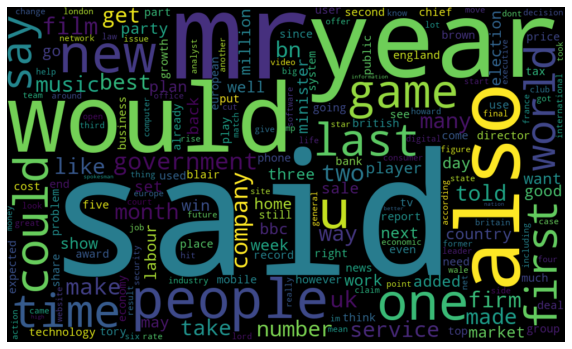

In [19]:
# Now let's generate a world cloud for the text
wc = WordCloud(width=1000, height=600, max_words=200).generate_from_frequencies(freq)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Looks pretty cool!

###### Generating N-grams, POS tagging

In [20]:
# now let's demonstrate the generation of n-grams and part-of-speech tagging
# let's create a list of bigrams and trigrams

# first, we have to generate a tokens list
tokens = " ".join(df.news_clean).split()

# then we'll generate the bigrams and trigrams
ngrams_2 = nltk.bigrams(tokens)
ngrams_3 = nltk.trigrams(tokens)

# now let's display each frequency distribution
freq_2grams = pd.Series(ngrams_2).value_counts().to_dict()
list(freq_2grams.items())[:20]

[(('last', 'year'), 501),
 (('said', 'mr'), 363),
 (('told', 'bbc'), 348),
 (('mr', 'blair'), 335),
 (('prime', 'minister'), 319),
 (('mr', 'brown'), 256),
 (('chief', 'executive'), 206),
 (('said', 'would'), 192),
 (('last', 'week'), 188),
 (('tony', 'blair'), 186),
 (('mobile', 'phone'), 183),
 (('bbc', 'news'), 178),
 (('general', 'election'), 177),
 (('new', 'york'), 167),
 (('bn', 'bn'), 163),
 (('six', 'nation'), 162),
 (('mr', 'howard'), 160),
 (('year', 'ago'), 160),
 (('liberal', 'democrat'), 157),
 (('number', 'one'), 147)]

In [21]:
freq_3grams = pd.Series(ngrams_3).value_counts().to_dict()
list(freq_3grams.items())[:20]

[(('told', 'bbc', 'news'), 147),
 (('bbc', 'news', 'website'), 97),
 (('told', 'bbc', 'radio'), 76),
 (('leader', 'michael', 'howard'), 58),
 (('mr', 'blair', 'said'), 54),
 (('million', 'dollar', 'baby'), 53),
 (('radio', 'today', 'programme'), 49),
 (('told', 'bbc', 'sport'), 48),
 (('bbc', 'radio', 'today'), 47),
 (('tory', 'leader', 'michael'), 41),
 (('mr', 'howard', 'said'), 41),
 (('next', 'general', 'election'), 39),
 (('chancellor', 'gordon', 'brown'), 33),
 (('prime', 'minister', 'tony'), 32),
 (('minister', 'tony', 'blair'), 32),
 (('leader', 'charles', 'kennedy'), 32),
 (('digital', 'music', 'player'), 30),
 (('two', 'year', 'ago'), 28),
 (('world', 'number', 'one'), 27),
 (('mr', 'blair', 'told'), 27)]

In [22]:
# cool! now let's experiment with part-of-speech tagging
nltk.download('averaged_perceptron_tagger')

pos_tags = pos_tag(tokens)
pos_tags[:20]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jerem\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('uk', 'JJ'),
 ('economy', 'NN'),
 ('facing', 'VBG'),
 ('major', 'JJ'),
 ('risk', 'NN'),
 ('uk', 'IN'),
 ('manufacturing', 'VBG'),
 ('sector', 'NN'),
 ('continue', 'VBP'),
 ('face', 'VBP'),
 ('serious', 'JJ'),
 ('challenge', 'NN'),
 ('next', 'IN'),
 ('two', 'CD'),
 ('year', 'NN'),
 ('british', 'JJ'),
 ('chamber', 'NN'),
 ('commerce', 'NN'),
 ('bcc', 'NN'),
 ('said', 'VBD')]

In [23]:
pos_counts = Counter([j for i,j in pos_tag(tokens)])
pos_counts

Counter({'JJ': 92905,
         'NN': 229072,
         'VBG': 19902,
         'IN': 7979,
         'VBP': 14159,
         'CD': 6699,
         'VBD': 34355,
         'RBS': 134,
         'RB': 23320,
         'VBN': 12926,
         'VB': 10843,
         'JJS': 2417,
         'JJR': 1794,
         'NNP': 1002,
         'RBR': 1045,
         'NNS': 10979,
         'WP$': 123,
         'MD': 5368,
         'VBZ': 3150,
         'DT': 819,
         'CC': 285,
         'RP': 392,
         'FW': 865,
         'PRP': 259,
         'WRB': 45,
         'WP': 72,
         'POS': 3,
         'WDT': 60,
         'EX': 69,
         'NNPS': 3,
         'PRP$': 15,
         'PDT': 4,
         'TO': 2,
         'UH': 10})

In [24]:
#sorted(pos_counts.items())
#the sorted function seems to only sort the counter by the first parameter

[(l,k) for k,l in sorted([(j,i) for i,j in pos_counts.items()], reverse=True)]

[('NN', 229072),
 ('JJ', 92905),
 ('VBD', 34355),
 ('RB', 23320),
 ('VBG', 19902),
 ('VBP', 14159),
 ('VBN', 12926),
 ('NNS', 10979),
 ('VB', 10843),
 ('IN', 7979),
 ('CD', 6699),
 ('MD', 5368),
 ('VBZ', 3150),
 ('JJS', 2417),
 ('JJR', 1794),
 ('RBR', 1045),
 ('NNP', 1002),
 ('FW', 865),
 ('DT', 819),
 ('RP', 392),
 ('CC', 285),
 ('PRP', 259),
 ('RBS', 134),
 ('WP$', 123),
 ('WP', 72),
 ('EX', 69),
 ('WDT', 60),
 ('WRB', 45),
 ('PRP$', 15),
 ('UH', 10),
 ('PDT', 4),
 ('POS', 3),
 ('NNPS', 3),
 ('TO', 2)]

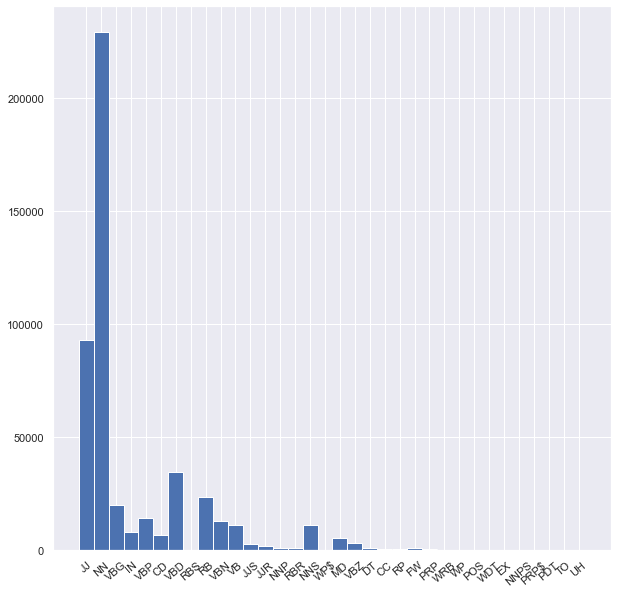

In [25]:
plt.figure(figsize=(10, 10))


plt.bar(list(pos_counts.keys()), list(pos_counts.values()), width=1)
plt.xticks(rotation = 40) 
plt.show()

The chart looks good! We can see that singular nouns are the most frequently used words in this dataset. Followed not-very-closely by adjectives and then past-tense verbs. Interesting!

###### Topic Model 

In [26]:
# Now let's do the following:
# Create a Topic model of the text
##  Find the optimal number of topics
##  test the accuracy of your model
##  Display your results 2 different ways. 1) Print the topics and explain any insights at this point. 2) Graph the topics and explain any insights at this point.

# first, let's get a list of the lemmatized text
lem_ls = list(df.news_clean.apply(lambda x: list(x.split())))
print(lem_ls[:1])

[['uk', 'economy', 'facing', 'major', 'risk', 'uk', 'manufacturing', 'sector', 'continue', 'face', 'serious', 'challenge', 'next', 'two', 'year', 'british', 'chamber', 'commerce', 'bcc', 'said', 'group', 'quarterly', 'survey', 'company', 'found', 'export', 'picked', 'last', 'three', 'month', 'best', 'level', 'eight', 'year', 'rise', 'came', 'despite', 'exchange', 'rate', 'cited', 'major', 'concern', 'however', 'bcc', 'found', 'whole', 'uk', 'economy', 'still', 'faced', 'major', 'risk', 'warned', 'growth', 'set', 'slow', 'recently', 'forecast', 'economic', 'growth', 'slow', 'little', 'manufacturer', 'domestic', 'sale', 'growth', 'fell', 'back', 'slightly', 'quarter', 'survey', 'firm', 'found', 'employment', 'manufacturing', 'also', 'fell', 'job', 'expectation', 'lowest', 'level', 'year', 'despite', 'positive', 'news', 'export', 'sector', 'worrying', 'sign', 'manufacturing', 'bcc', 'said', 'result', 'reinforce', 'concern', 'sector', 'persistent', 'inability', 'sustain', 'recovery', 'outl

In [27]:
# now let's construct a dictionary of the lemmatized terms and a term document frequency (TDF) for the data
id2word = corpora.Dictionary(lem_ls)
corpus = [id2word.doc2bow(post) for post in lem_ls]

In [28]:
# now we can train the Latent Dirichlet Allocation (LDA) model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
print(lda_model.print_topics())

[(0, '0.014*"said" + 0.009*"people" + 0.008*"game" + 0.007*"computer" + 0.006*"software" + 0.006*"pc" + 0.006*"new" + 0.006*"year" + 0.005*"site" + 0.005*"mr"'), (1, '0.010*"game" + 0.009*"said" + 0.005*"time" + 0.005*"player" + 0.005*"one" + 0.005*"would" + 0.004*"world" + 0.004*"win" + 0.004*"play" + 0.004*"year"'), (2, '0.018*"said" + 0.013*"mr" + 0.007*"would" + 0.006*"brown" + 0.006*"minister" + 0.006*"blair" + 0.005*"labour" + 0.005*"wale" + 0.004*"told" + 0.004*"also"'), (3, '0.017*"film" + 0.013*"best" + 0.012*"award" + 0.009*"year" + 0.008*"said" + 0.006*"star" + 0.006*"u" + 0.005*"also" + 0.005*"one" + 0.005*"actor"'), (4, '0.017*"said" + 0.010*"bn" + 0.010*"year" + 0.009*"u" + 0.007*"bank" + 0.007*"company" + 0.007*"market" + 0.006*"firm" + 0.005*"price" + 0.005*"share"'), (5, '0.021*"said" + 0.015*"mr" + 0.011*"government" + 0.011*"would" + 0.009*"party" + 0.008*"election" + 0.008*"people" + 0.008*"labour" + 0.007*"tax" + 0.007*"tory"'), (6, '0.013*"said" + 0.006*"european"

In [29]:
# now let's evaluate the performance of the model using the coherence score
# i will use the c_v coherence measure
coherence_model_lda = CoherenceModel(model=lda_model, 
                                     texts=lem_ls, 
                                     dictionary=id2word, 
                                     coherence='c_v')

# retreive the coherence_scores
coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4322547336355346


In [30]:
scores = []
for i in range(2,21):
    print(f'Calcuting for {i} topics')
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=i, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
    # compute the coherence score
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=lem_ls, 
                                         dictionary=id2word, 
                                         coherence='c_v')

    # retreive the coherence_scores
    coherence_lda = coherence_model_lda.get_coherence()
    
    scores.append((i,coherence_lda))
    print(f'Calculated for {i} topics, score={coherence_lda}')

Calcuting for 2 topics
Calculated for 2 topics, score=0.28167772645788935
Calcuting for 3 topics
Calculated for 3 topics, score=0.3180712692974153
Calcuting for 4 topics
Calculated for 4 topics, score=0.3980188975347121
Calcuting for 5 topics
Calculated for 5 topics, score=0.39484309378615434
Calcuting for 6 topics
Calculated for 6 topics, score=0.37606451079916026
Calcuting for 7 topics
Calculated for 7 topics, score=0.42574090525094205
Calcuting for 8 topics
Calculated for 8 topics, score=0.3914575827387896
Calcuting for 9 topics
Calculated for 9 topics, score=0.43033149602739773
Calcuting for 10 topics
Calculated for 10 topics, score=0.44004935500220155
Calcuting for 11 topics
Calculated for 11 topics, score=0.4397729519536738
Calcuting for 12 topics
Calculated for 12 topics, score=0.4382942561317704
Calcuting for 13 topics
Calculated for 13 topics, score=0.4306213852145141
Calcuting for 14 topics
Calculated for 14 topics, score=0.45763424659625435
Calcuting for 15 topics
Calculated

In [31]:
scores

[(2, 0.28167772645788935),
 (3, 0.3180712692974153),
 (4, 0.3980188975347121),
 (5, 0.39484309378615434),
 (6, 0.37606451079916026),
 (7, 0.42574090525094205),
 (8, 0.3914575827387896),
 (9, 0.43033149602739773),
 (10, 0.44004935500220155),
 (11, 0.4397729519536738),
 (12, 0.4382942561317704),
 (13, 0.4306213852145141),
 (14, 0.45763424659625435),
 (15, 0.4095548106177847),
 (16, 0.4794508919213351),
 (17, 0.47548700413543216),
 (18, 0.43563044618944563),
 (19, 0.4845063870589336),
 (20, 0.4490077297577888)]

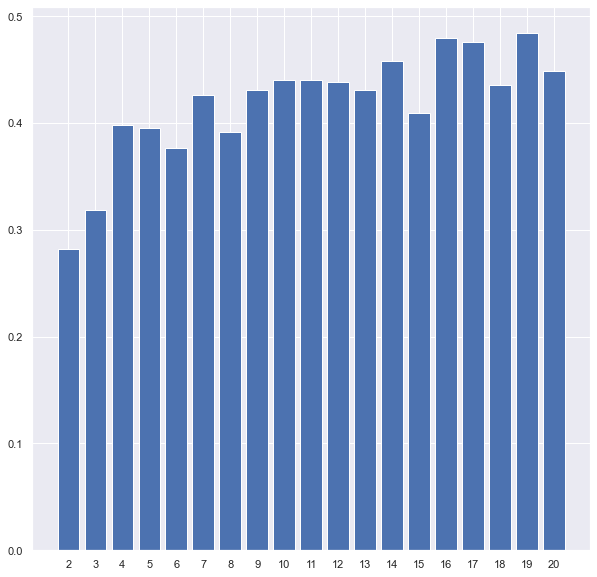

In [32]:
x_axis = []
y_axis = []
for (x,y) in scores:
    x_axis.append(x)
    y_axis.append(y)

plt.figure(figsize=(10, 10))
plt.bar(x_axis, y_axis)
locs, labels = plt.xticks()
plt.xticks(range(2,21))
plt.show()


So, it's clear that i=19 has the highest score. Now let's run the model again with 19 topics.

In [39]:
model_lda = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=19, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

coherence_model_lda = CoherenceModel(model=model_lda, 
                                         texts=lem_ls, 
                                         dictionary=id2word, 
                                         coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print(f'Calculated score for 19 topics={coherence_lda}')

Calculated score for 19 topics=0.45707850779759884


Hmm, this score is different from the previous list's 19-topic score. Why is this?

In [36]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(bf_lda_model, corpus, id2word)

# The first way I will display the topics is by saving it to an html file. 
# This creates a visualization of the topics and their relative significance and similarity
pyLDAvis.save_html(LDAvis_prepared,'topic_model_viz.html')

From the first visualization of the data, I can gain many insights. I noticed the following about the visualization:
* Topics 7, 10, and 14 are very similar
* Topics 1, 2, and 11 are also similar, but less similar than 7, 10, and 14
* Topics 12, 13, 15, 16, 17, 18, and 19 are not very similar to any other topic
* The 3 pairs of topics 3&5, 4&6, and 8&9 have the lowest non-zero degree of similarity between their respective members
* By far, "said" was the word most frequently used for most topics, but some topics listed most frequently used words such as "mr", "yukos", "film", "game", and "sale". 

In [37]:
# The second way I will display the topics is simply by listing them
print(LDAvis_prepared)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13    -0.088604 -0.046877       1        1  11.506211
14    -0.121086 -0.098933       2        1  11.283993
7     -0.176390  0.094321       3        1   9.443142
2      0.052304  0.112797       4        1   8.731224
0     -0.132669  0.107246       5        1   8.621749
1     -0.001579  0.120747       6        1   8.415720
3      0.125225  0.088060       7        1   7.095438
5     -0.115816 -0.004430       8        1   7.032872
17    -0.164994  0.003665       9        1   4.951989
10     0.147392  0.096615      10        1   4.122837
16    -0.082301 -0.088562      11        1   4.009560
6      0.016403  0.036744      12        1   3.392675
4      0.059829  0.012537      13        1   3.285216
11     0.111641  0.077100      14        1   2.330011
8      0.037167 -0.039064      15        1   1.608327
15     0.037765 -0.160824      16        1   1.4243

From this second visualization of the topic data, I can gain the following insights:
* The size of the topic number steadily decreases as we include more and more topics (that particular topic number's % of the total words as the number of topics increases. 1000 words / 1 topic = 1000, 1000 words / 19 topics = 52.6)
* I can see that particular topic's X and Y coordinates

# V. Conclusion

This assignment was really interesting! It's really practical when it comes to web-scraping from social media, news sites, and other text-based data. I'm really interested to explore this further on my own. The word cloud was really captivating too, I really enjoyed that part of the assignment, even if it was just a small section of it. One note of concern: even though random_state was invoked so as to ensure consistency between runs of the LDA model, I still had variance when I ran the models each time. This was very strange. 

Thank you!
Jeremy 

# VI. References

1) Class dataset provided for this assignment: bbc.csv

2) From the Experts PDF: Week 7

3) Week 7 Assignment Lab (Jupyter Notebook)

4) L. (2019, April 29). Categorizing and POS Tagging with NLTK Python | Learntek. LEARNTEK. Retrieved April 24, 2022, from https://www.learntek.org/blog/categorizing-pos-tagging-nltk-python/

5) Pandas documentation, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html

